# Collab and Compete in Tennis Env

---
## Collab and Compete: REPORT

<img src="https://user-images.githubusercontent.com/10624937/42135623-e770e354-7d12-11e8-998d-29fc74429ca2.gif">

## Introduction

This report provides a description of the implementation for the Deep Reinforcement Learning Nanodegree Project 3, where I had to train agents to play Tennis. Please refer to the [README.md]() on this repository for more information. Both vanilla DDPG and multi agent DDPG algorithms have been used to achieve the learned agents.

## Learning Algorithm 

1. ### The Agent(s)

  #### DDPG Agent

   
   The agent architecture can be found on "**ddpg_agent.py**" . This file implements an "Agent" class that holds:

   * config (class defined on the notebook): A set of parameters that will define the agent hyperparameters

   The agent uses an actor-critic DDPG algorithm. Some of the highlights of this algorithm are.
   * Actor critic network architecture
   * off-policy (slower convergence but more stable)
   * supports continous observation space and continous actions space.
   * Uses random experience replay
   * Uses multiple actors to parallely populate the replay buffer and thus train faster(since both agents share    the actor and critic models)
   * Uses double network (for actor/critic each). One for target and one for learning. Soft update is used to 
      slowly blend the target to the local model. 
    
  
  #### MADDPG Agent

   
   The agent architecture can be found on "**maddpg_agent.py**" . This file implements an "Agent" class that holds:

   * config (class defined on the notebook): A set of parameters that will define the agent hyperparameters

   The agent uses an actor-critic DDPG algorithm. Some of the highlights of this algorithm are.
   * Actor critic network architecture with a centealized critic and decentralized actors.
   * For this particular problem, the actors are considered symmmetric and hence the just same actor network is used for both players.
   * off-policy (slower convergence but more stable)
   * supports continous observation space and continous actions space.
   * Uses random experience replay
   * Uses double network (for actor/critic each). One for target and one for learning. Soft update is used to 
      slowly blend the target to the local model. 


 2. ### The Policy network 
 
 Also described in the README.md file.
 
  #### DDPG Agent
 
  **Actor(Decentralized and shared between players)**   
    - Hidden: (input, 128)  - ReLU
    - Hidden                - BatchNorm
    - Hidden: (128, 128)    - ReLU
    - Hidden                - BatchNorm
    - Output: (128, 4)      - TanH

  **Critic(Decentralized and shared between players)**
    - Hidden: (input, 128)                - ReLU
    - Hidden                              - BatchNorm
    - Hidden: (128 + action_size=2, 128)  - ReLU
    - Hidden                              - BatchNorm
    - Output: (128, 1)                  ' - Linear
    
    
    
  #### MADDPG Agent   
  
   **Actor (Decentralized and shared between players)**   
    - Hidden: (input, 128)  - ReLU
    - Hidden                - BatchNorm
    - Hidden: (128, 128)    - ReLU
    - Hidden                - BatchNorm
    - Output: (128, 4)      - TanH
    
  
  **Critic (Centralized and shared between players)**
    - Hidden: (input x nume of agent(=2) , 128)                     - ReLU
    - Hidden                                                        - BatchNorm
    - Hidden: (128 + nume of agent(=2) x action_size(=2)=4, 128)    - ReLU
    - Hidden                                                        - BatchNorm
    - Output: (128, 1)  

3. ### Hyper-parameters

    As described in (more details) the README.md file the following hyper parameters are used in this algorithm.

  - Learning Rate: 1e-3/2e-3 ( DNN actor/critic) # learning rate 
  - Batch Size: 128     # minibatch size
  - Replay Buffer: 1e6  # replay buffer size
  - Gamma: 0.99         # discount factor
  - Tau: 3e-3           # for soft update of target parameters
  - Ornstein-Uhlenbeck noise parameters (0.15 theta and 0.1 sigma.) # Noise use to introduce entropy in the system to explore more
  - max_episodes Size: 1500     # Maximum number of episodes for which training will proceed
  - checkpoint_score: 1     # if the score is greater than this threshold, network is checkpointed. 
  - goal_score: 5     # if the score is greater than this threshold, network is checkpointed and training is finished. 


### Results

Two different agent architecture has been trained. Please check the Tennis_Control.ipynb notebook file for more details.

**DDPG agent** 

The DDPG agent training took more time but it seemed to be more stable than the MADDPG agent. This seems to make sense as stationarity of the environment guarantees convergence.

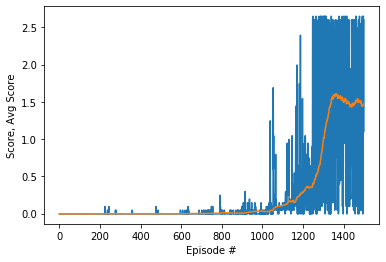

The actor and critic models are checkpointed in the MultiAgentCheckPt folder <br>

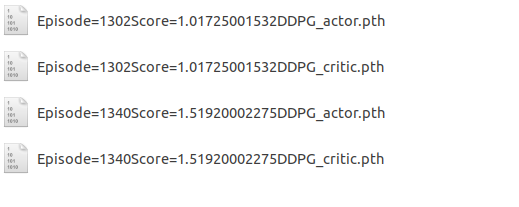


**MADDPG agent** 

The MADDPG training took less time but it went little unstable. One point to note is the critic model for both DDPG and MADDPG was of similar architecture (except the obvious change needed to accommodate double action and observation size). However more complex hidden networks/layers could be needed to capture the dynamics of a centralized critic.

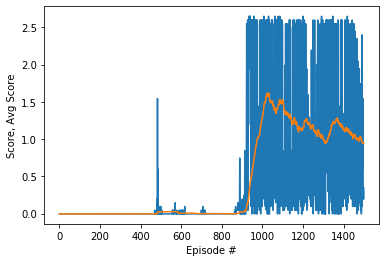

The actor and critic models are checkpointed in the MultiAgentCheckPt folder <br>

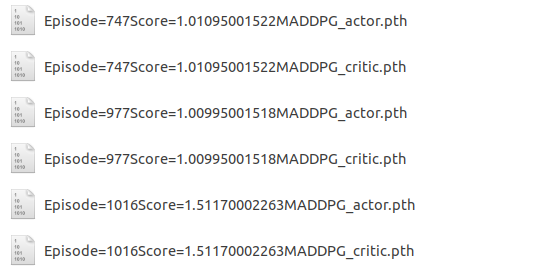



### Future Work

All this results and conclusions suggest a series of changes (Future Work) to improve the agent's performance and to reduce it's instability. Future work will include 


* To implement policy based algorithms (PPO) in the multi-agent setup. 
* A Distributional Perspective on Reinforcement Learning. 
* Study different and more complex NN' architectures applicable to the problem.
* Auto tune hyper paramaters and NN architectures 


### References

* [1] DPG: Deterministic Policy Gradient Algorithms  (http://proceedings.mlr.press/v32/silver14.pdf))
* [2] DDPG:Human-level control through deep reinforcement learning (https://www.nature.com/articles/nature14236)
* [3] Deep Reinforcement Learning with Double Q-learning (https://arxiv.org/abs/1509.06461)
* [4] Prioritized Experience Replay (https://arxiv.org/abs/1511.05952)
* [5] D4PG: DISTRIBUTED DISTRIBUTIONAL DETERMINISTIC POLICY GRADIENTS (https://arxiv.org/pdf/1804.08617.pdf)
* [6] Reinforcement Learning: An Introduction (https://s3-us-west-1.amazonaws.com/udacity-drlnd/bookdraft2018.pdf)
* [7] A Distributional Perspective on Reinforcement Learning (https://arxiv.org/abs/1707.06887)
* [8]. Ray -rllib - A distributed framework for RL and hyperparameter tuning (https://ray.readthedocs.io/en/latest/rllib.html)
